In [1]:
%load_ext autoreload
%autoreload 2

from functools import partial
from copy import deepcopy

In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

from ex1.main import Simulation
from ex1.main import read_scenario

rc('animation', html='jshtml')
%matplotlib inline

In [17]:
scenario = read_scenario('scenario.json')
states = Simulation(scenario).get_states()

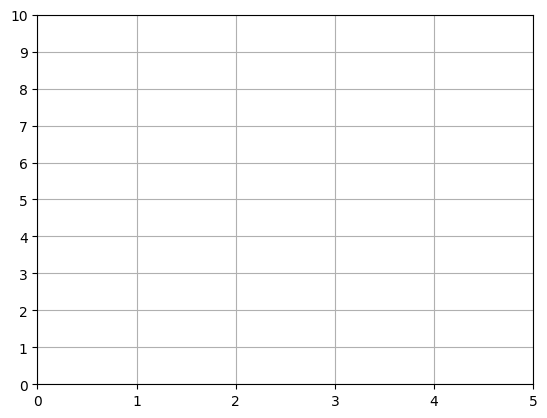

In [18]:
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, scenario.field[1] + 1, 1))
ax.set_yticks(np.arange(0, scenario.field[0] + 1, 1))
plt.grid()

ax.set_xlim((0, scenario.field[1]))
ax.set_ylim((0, scenario.field[0]))

# line, = ax.plot([], [], lw=2)
colors = ['b', 'r', 'g']
cmap = matplotlib.colors.ListedColormap(colors)
sc_plot = ax.scatter([], [], c=[], cmap=cmap)

In [19]:
offsets = []
for state in states:
    offsets.append(np.concatenate((state.pedestrians, state.obstacles, state.target)))
offsets = np.array(offsets)
offsets[..., 0], offsets[..., 1] = offsets[..., 1], offsets[..., 0].copy()
colors = np.concatenate((
    np.zeros(states[0].pedestrians.shape[0]),
    np.zeros(states[0].obstacles.shape[0]) + 1,
    np.zeros(states[0].target.shape[0]) + 2,
))


def init():
    sc_plot.set_offsets([[0, 0]])
    return (sc_plot,)


def animate(i, sc_plot):
    sc_plot.set_offsets(offsets[i])
    sc_plot.set_array(colors)
    return (sc_plot,)


anim = animation.FuncAnimation(fig, partial(animate, sc_plot=sc_plot), init_func=init,
                               frames=len(states), interval=600, blit=True)
anim

In [7]:
#HTML(anim.to_html5_video())

array([[4, 0],
       [2, 0],
       [2, 3],
       [1, 4],
       [8, 4]])